In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from pandas import Series, DataFrame

In [2]:
from sklearn.neighbors import KNeighborsClassifier

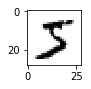

In [3]:
# 查看一张图片

digit = plt.imread('./numbers/5/5_1.bmp')

#将digit变黑白 
plt.figure(figsize=(1, 1))
plt.imshow(digit, cmap='gray')

In [4]:
# 获取每张图片和结果
data = []
target = []

# 10个文件夹
for i in range(10):
    # 1-500文件
    for j in range(1, 501):
        digit = plt.imread('./numbers/%d/%d_%d.bmp'%(i, i, j))
        # 图片
        data.append(digit)
        # 数字
        target.append(i)

In [5]:
# 转换成ndarray
X = np.array(data)
y = np.array(target)

In [6]:
display(X.shape, y.shape)
# 三维数据，不能交给算法，进行学习

(5000, 28, 28)

(5000,)

In [12]:
# reshape将数据改变形状
X = X.reshape(5000, 28*28)
X.shape

(5000, 784)

In [13]:
# 划分训练数据和测试数据
from sklearn.model_selection import train_test_split

In [14]:
# 划分数据举例

a = np.arange(0 ,10)

# 会打乱顺序,并将数据进行划分, test_size可以给比例可以给数值
train_test_split(a, test_size=2)
# 前面部分是训练数据, 后面是测试数据

[array([2, 6, 4, 9, 0, 7, 5, 1]), array([8, 3])]

In [18]:
# 划分数据举例(多个数据划分)
a = np.arange(0 ,10)

b = np.arange(-10, 0)
# a, b数据数量一致

display(a, b)
train_test_split(a, b, test_size=2)
# 分割的结果a, b索引一一对应

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

[array([8, 7, 3, 4, 6, 0, 1, 2]),
 array([9, 5]),
 array([ -2,  -3,  -7,  -6,  -4, -10,  -9,  -8]),
 array([-1, -5])]

In [19]:
# 生成训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
# 邻居数量给基数
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_ = knn.predict(X_test)

(y_ == y_test).mean()

0.948

In [21]:
# 邻居数量给基数
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

y_ = knn.predict(X_test)

(y_ == y_test).mean()

0.956

In [22]:
# 保存算法
from sklearn.externals import joblib

In [23]:
# .m model模型
joblib.dump(knn, './digit_recognize.m')

['./digit_recognize.m']

In [24]:
# 加载算法
digit_detector = joblib.load('./digit_recognize.m')

digit_detector

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [26]:
# 使用加载算法预测
y_ = digit_detector.predict(X_test[: 100])

(y_ == y_test[: 100]).mean()

0.97

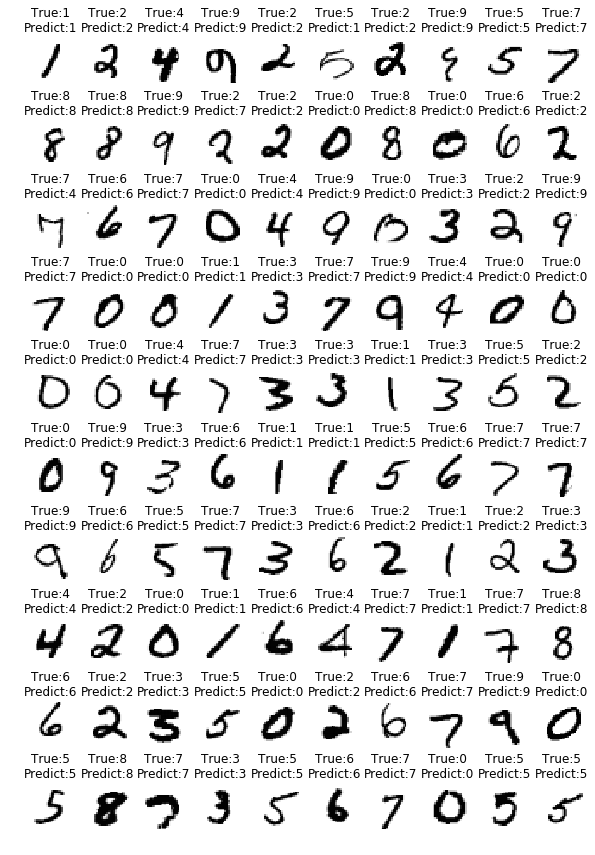

In [27]:
plt.figure(figsize=(1*10,1.5*10))
for i in range(100):
    
#     10行10列
    axes = plt.subplot(10,10,1 + i)
#     画数字，X_test，数据
    axes.imshow(X_test[i].reshape(28,28),cmap = 'gray')
    
#     真实数字y_test中
    t = y_test[i]
#     预测y_
    p = y_[i]
#     标题
    axes.set_title('True:%d\nPredict:%d'%(t, p))
    # 不显示刻度
    axes.axis('off')